# Maui AirBnB 🌴🏡🌴

## Imports 📝

In [39]:
# 1 - Data Manipulation
import pandas as pd
import numpy as np
import re

# 2 - Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [40]:
# Calling in the data sets and combining them
listing_df= pd.read_csv('../raw_data/listings.csv')

reviews_df = pd.read_csv('../raw_data/reviews.csv')

neighbourhoods_df = pd.read_csv('../raw_data/neighbourhoods.csv')

In [41]:
#looks like this has all the most pertinate data. 
listing_df.head(1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,7620,Lea & Pat,Hawaii,South Kohala,20.0274,-155.702,Entire home/apt,144,5,27,2023-03-31,0.18,4,180,7,119-269-5808-01R


In [42]:
# not sure if i'll need this yet, but we'll see.
reviews_df.head(1)

,listing_id,date
0,5269,2011-05-31


In [43]:
#looks like this is already in the listing CSV
neighbourhoods_df

,neighbourhood_group,neighbourhood
0,Hawaii,Hamakua
1,Hawaii,Kau
2,Hawaii,North Hilo
3,Hawaii,North Kohala
4,Hawaii,North Kona
5,Hawaii,Puna
6,Hawaii,South Hilo
7,Hawaii,South Kohala
8,Hawaii,South Kona
9,Honolulu,Central Oahu


In [44]:
#seeing what is what and what needs to be changed
listing_df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [45]:
#are there null values?
listing_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32592,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
32593,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True
32594,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
32595,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False


## Data Cleaning 🧼

In [46]:
#this information can be useful later
listing_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.259700e+04,3.259700e+04,32597.000000,32597.000000,32597.000000,32597.000000,32597.000000,24919.000000,32597.000000,32597.000000,32597.000000
mean,2.839755e+17,1.618320e+08,20.895537,-157.182316,475.113507,7.653250,33.309446,1.241528,82.009725,195.270577,9.882228
std,3.667659e+17,1.589057e+08,0.808262,1.271650,1400.798440,23.108627,63.169093,1.393441,118.840762,115.584092,15.563200
min,5.269000e+03,8.840000e+02,18.920250,-159.714620,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.020910e+07,3.402433e+07,20.689200,-157.838390,163.000000,1.000000,1.000000,0.270000,2.000000,91.000000,0.000000
50%,4.975166e+07,1.071331e+08,20.956990,-156.690492,259.000000,2.000000,8.000000,0.760000,20.000000,206.000000,3.000000
75%,6.998112e+17,2.567747e+08,21.291900,-156.381400,440.000000,5.000000,37.000000,1.800000,110.000000,297.000000,14.000000
max,9.102671e+17,5.184696e+08,22.229090,-154.839500,99110.000000,1000.000000,1154.000000,42.220000,457.000000,365.000000,218.000000


In [47]:
# Checking for dulicated
listing_df.duplicated().sum()

0

In [48]:
#checking for null values per-collumn
listing_df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7678
reviews_per_month                 7678
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6356
dtype: int64

In [49]:
# we don't need "last review", "reviews per month", or the 'license' as they don't tell us much.
listing_df.drop(columns=['last_review', 'reviews_per_month', 'license'], inplace=True)
listing_df['host_name'].fillna('Unknown', inplace = True)

In [50]:
listing_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5269,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,7620,Lea & Pat,Hawaii,South Kohala,20.027400,-155.702000,Entire home/apt,144,5,27,4,180,7
1,81566,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,442490,Susan,Honolulu,North Shore Oahu,21.589247,-158.111008,Entire home/apt,250,4,260,1,249,15
2,5387,Rental unit in Captain Cook · ★4.65 · Studio ·...,7878,Edward,Hawaii,South Kona,19.430810,-155.880690,Entire home/apt,105,5,208,3,151,15


In [51]:
listing_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [52]:
#we need to get the rating, the beds, bedrooms and baths into there own columns
listing_df['name'][1]

'Rental unit in Haleiwa · ★4.67 · 2 bedrooms · 2 beds · 1 bath'

In [53]:
#wrote some python code that will help us break down the 'name' collumn.


def split_name(name):
    unit_type = re.findall(r'(.*) ·', name)
    unit_type = unit_type[0].strip() if unit_type else None

    rating = re.findall(r'★([\d.]+)', name)
    rating = float(rating[0]) if rating else None

    bedroom_number = re.findall(r'(\d+) bedrooms?', name)
    bedroom_number = int(bedroom_number[0]) if bedroom_number else None

    bed_number = re.findall(r'(\d+) beds?', name)
    bed_number = int(bed_number[0]) if bed_number else None

    bath_number = re.findall(r'(\d+) baths?', name)
    bath_number = int(bath_number[0]) if bath_number else None


    
    return unit_type, rating, bedroom_number, bed_number, bath_number

In [54]:
#we are going to use the above code to iterate through the name column
# making 5 more column then we can drop the name column.
listing_df[['unit_type', 'rating', 'bedroom_number', 'bed_number', 'bath_number']] = listing_df['name'].apply(split_name).apply(pd.Series)

In [62]:
#some places don't have ratings because they are new
listing_df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,unit_type,rating,bedroom_number,bed_number,bath_number
32594,908814612038475768,Rental unit in Honolulu · ★New · Studio · 2 be...,43793840,Mark,Honolulu,Primary Urban Center,21.282890,-157.831660,Entire home/apt,175,2,0,182,4,0,Rental unit in Honolulu · ★New · Studio · 2 beds,New,0.0,2.0,1.0
32595,908821427715937106,Rental unit in Princeville · ★New · 1 bedroom ...,240078487,Steven,Kauai,North Shore Kauai,22.219156,-159.485522,Entire home/apt,228,2,0,110,90,0,Rental unit in Princeville · ★New · 1 bedroom ...,New,1.0,1.0,1.0
32596,908851517358534174,Rental unit in Honolulu · ★New · Studio · 2 be...,43793840,Mark,Honolulu,Primary Urban Center,21.282678,-157.832520,Entire home/apt,167,2,0,182,4,0,Rental unit in Honolulu · ★New · Studio · 2 beds,New,0.0,2.0,1.0


In [57]:
#not we need to fill the nans with zeros as not all of them have these things
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
unit_type                             0
rating                            11701
bedroom_number                     4397
bed_number                           70
bath_number                        2600
dtype: int64

In [60]:
#these ones are intergers
listing_df['bedroom_number'].fillna(0.0, inplace=True)
listing_df['bed_number'].fillna(0.0, inplace=True)
listing_df['bath_number'].fillna(0.0,inplace=True)

#this will have to be an object
listing_df['rating'].fillna('New',inplace=True)

In [61]:
#checking to see if I missed anything
listing_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
unit_type                         0
rating                            0
bedroom_number                    0
bed_number                        0
bath_number                       0
dtype: int64

In [66]:
#the unit didn't work so let's code a little thing to help it
def extract_unit_type(unit_type):
    if 'in' in unit_type:
        unit_type = unit_type.split('in')[0].strip()
    return unit_type

# Apply the function to the 'unit type' column and store the results in a new column
listing_df['unit type'] = listing_df['unit_type'].apply(extract_unit_type)

In [67]:
listing_df['unit type']

0        Rental unit
1        Rental unit
2        Rental unit
3               Home
4        Rental unit
            ...     
32592    Rental unit
32593    Rental unit
32594    Rental unit
32595    Rental unit
32596    Rental unit
Name: unit type, Length: 32597, dtype: object

In [68]:
listing_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,unit_type,rating,bedroom_number,bed_number,bath_number,unit type
0,5269,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,7620,Lea & Pat,Hawaii,South Kohala,20.027400,-155.702000,Entire home/apt,144,...,27,4,180,7,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,4.65,1.0,1.0,1.0,Rental unit
1,81566,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,442490,Susan,Honolulu,North Shore Oahu,21.589247,-158.111008,Entire home/apt,250,...,260,1,249,15,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,4.67,2.0,2.0,1.0,Rental unit
2,5387,Rental unit in Captain Cook · ★4.65 · Studio ·...,7878,Edward,Hawaii,South Kona,19.430810,-155.880690,Entire home/apt,105,...,208,3,151,15,Rental unit in Captain Cook · ★4.65 · Studio ·...,4.65,0.0,2.0,1.0,Rental unit


In [70]:
# okay now we can drop unecessary columns again
listing_df.drop(columns=['name', 'unit_type'], inplace = True)

In [71]:
listing_df.head(3)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedroom_number,bed_number,bath_number,unit type
0,5269,7620,Lea & Pat,Hawaii,South Kohala,20.027400,-155.702000,Entire home/apt,144,5,27,4,180,7,4.65,1.0,1.0,1.0,Rental unit
1,81566,442490,Susan,Honolulu,North Shore Oahu,21.589247,-158.111008,Entire home/apt,250,4,260,1,249,15,4.67,2.0,2.0,1.0,Rental unit
2,5387,7878,Edward,Hawaii,South Kona,19.430810,-155.880690,Entire home/apt,105,5,208,3,151,15,4.65,0.0,2.0,1.0,Rental unit


In [74]:
listing_df['neighbourhood_group'].unique()

array(['Hawaii', 'Honolulu', 'Maui', 'Kauai'], dtype=object)

In [75]:
# so now we want the maui only neighbourhoods
# but we can seperate them other islands for later use.
maui_df = listing_df[listing_df['neighbourhood_group'] == 'Maui']
honolulu_df = listing_df[listing_df['neighbourhood_group'] == 'Honolulu']
Hawaii_df = listing_df[listing_df['neighbourhood_group'] == 'Hawaii']
Kauai_df = listing_df[listing_df['neighbourhood_group'] == 'Kauai']

In [90]:
maui_df.dtypes

id                                  int64
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
rating                             object
bedroom_number                    float64
bed_number                        float64
bath_number                       float64
unit type                          object
dtype: object

In [76]:
# let's turn this data set into it's own CSV file to use in other apps
maui_df.to_csv('maui_dataset.csv',index=False)

In [77]:
honolulu_df.to_csv('honolulu_dataset.csv',index=False)
Hawaii_df.to_csv('hawaii_dataset.csv',index=False)
Kauai_df.to_csv('kauai_dataset.csv',index=False)

In [82]:
maui_df.head(1)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedroom_number,bed_number,bath_number,unit type
8,84405,461037,Crystal,Maui,Lahaina,20.99596,-156.66574,Entire home/apt,687,3,28,22,298,0,4.5,3.0,3.0,5.0,Townhouse


In [91]:
column_names = maui_df.columns.tolist()
column_names

['id',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'rating',
 'bedroom_number',
 'bed_number',
 'bath_number',
 'unit type']

# Data Analysis    

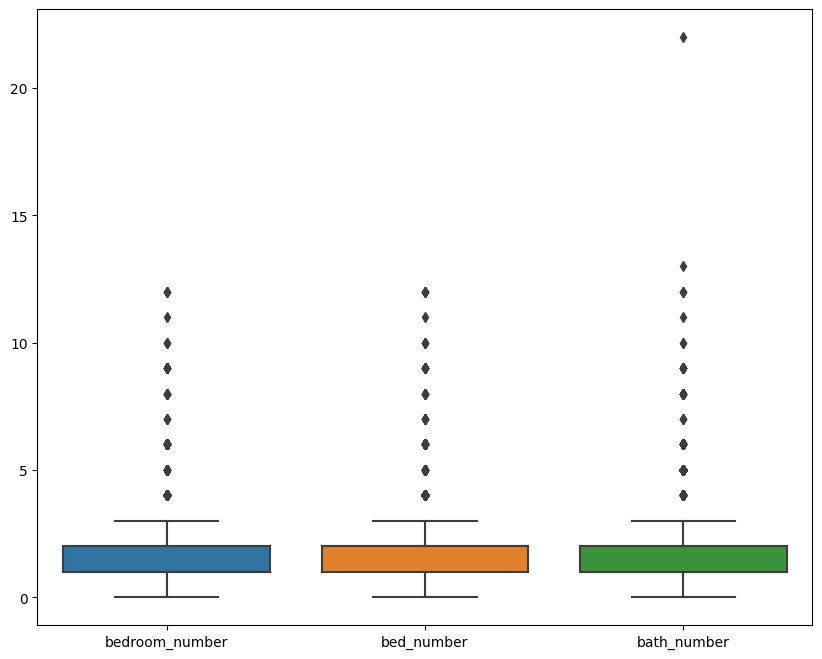

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(data=maui_df[['bedroom_number','bed_number', 'bath_number']])
plt.show()